# **Start Up Success Prediction**
### Pendahuluan

Model ini bertujuan untuk memprediksi keberhasilan sebuah startup dengan memanfaatkan data historis yang mencakup karakteristik pendanaan, milestone, dan jaringan relasi. Dengan menggunakan pendekatan klasifikasi biner berbasis deep learning, model ini dikembangkan untuk membantu investor dan lembaga keuangan dalam mengidentifikasi startup yang berpotensi berhasil dan layak untuk didanai.

Dalam proyek ini, kami akan mengembangkan dua model prediktif menggunakan TensorFlow, yang difokuskan untuk:

1. Menilai potensi keberhasilan sebuah startup.
2. Menyediakan dasar evaluasi yang obyektif bagi investor dan lembaga pembiayaan.

### Pernyataan Masalah

Banyak investor serta lembaga keuangan seperti bank menghadapi tantangan dalam menentukan startup mana yang layak didanai. Salah satu penyebab utamanya adalah keterbatasan akses terhadap data keuangan yang akurat, transparan, dan tersandarisasi dari pihak startup. Proses penilaian terhadap kelayakan pendanaan seringkali memakan waktu lama, bersifat subjektif, dan bergantung pada pengalaman pribadi evaluator.

Akibatnya, potensi investasi yang seharusnya menjanjikan justru bisa terlewat atau ditolak karena penilaian yang tidak optimal. Dengan pendekatan machine learning, proses ini dapat dipercepat, distandarisasi, dan didukung dengan pembelajaran dari data historis yang relevan.

Dataset yang digunakan berasal dari Kaggle:
🔗 [Startup Success Prediction Dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction?select=startup+data.csv)


# Import Library

In [52]:
# Data & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Evaluasi
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    auc as sklearn_auc,
    auc
)

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras import regularizers

# Utility
import joblib
from google.colab import drive

# Gathering Data

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datacp_dbs/startup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
Unnamed: 6,493
name,0
labels,0


In [ ]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

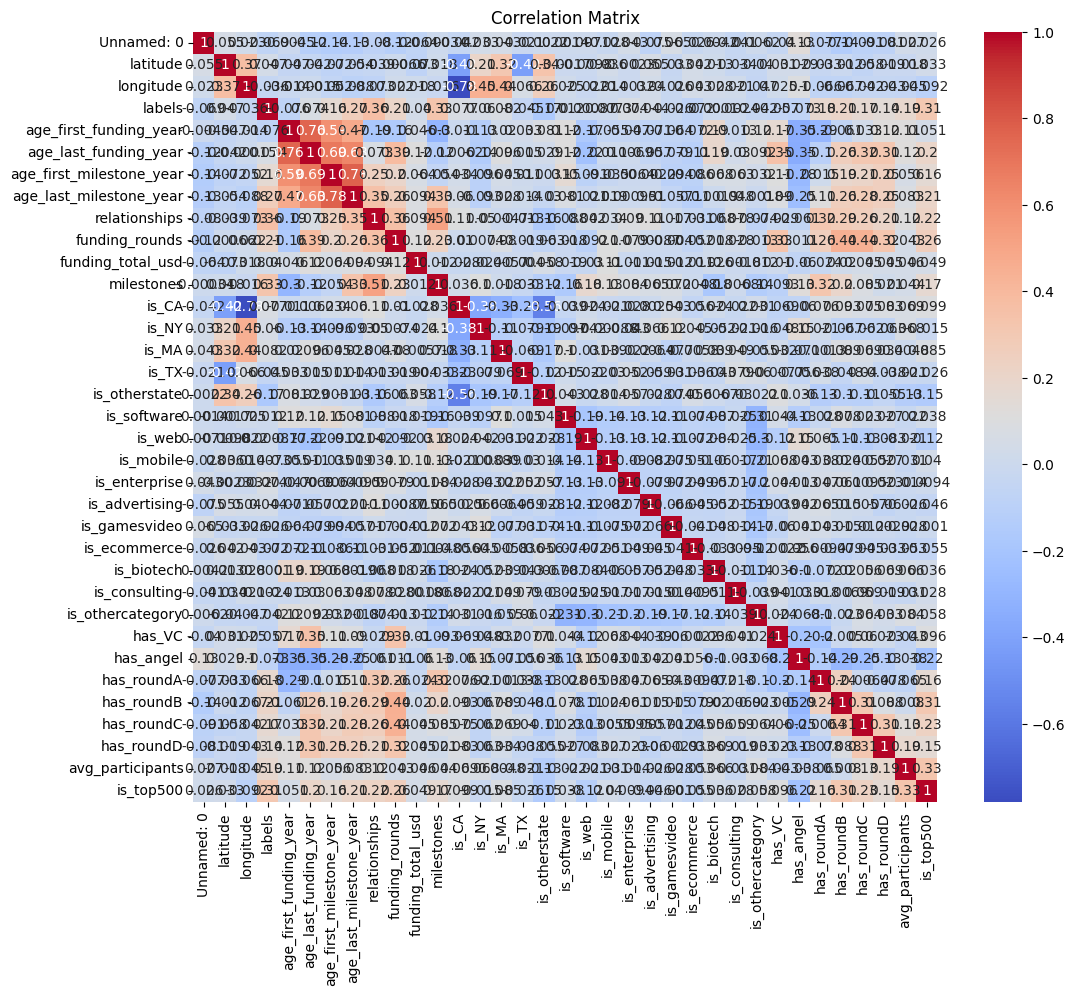

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
correlation = df.select_dtypes(include=[np.number]).corr()
target_correlation = correlation['labels']
threshold = 0.1
significant_features = target_correlation[(target_correlation > threshold) | (target_correlation < -threshold)]
print("Significant Features:")
print(significant_features)

Significant Features:
labels                      1.000000
age_first_milestone_year    0.162279
age_last_milestone_year     0.265871
relationships               0.360434
funding_rounds              0.206049
milestones                  0.328260
is_otherstate              -0.169067
has_roundA                  0.184307
has_roundB                  0.208257
has_roundC                  0.165902
has_roundD                  0.139940
avg_participants            0.185992
is_top500                   0.310652
Name: labels, dtype: float64


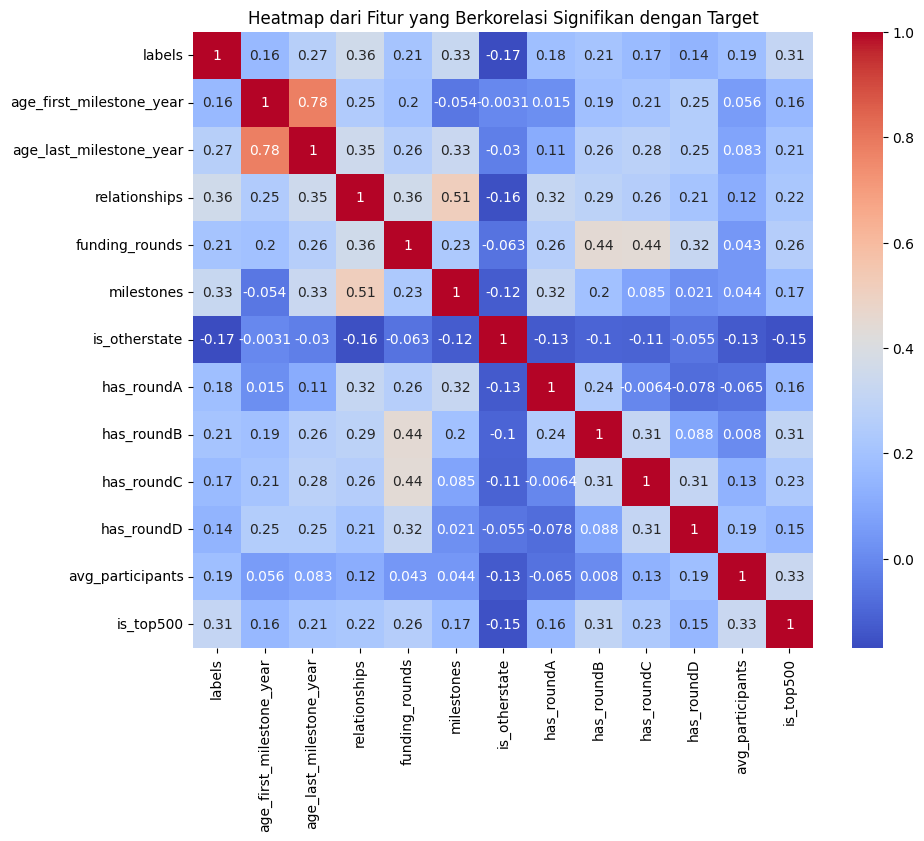

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[significant_features.index].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap dari Fitur yang Berkorelasi Signifikan dengan Target")
plt.show()

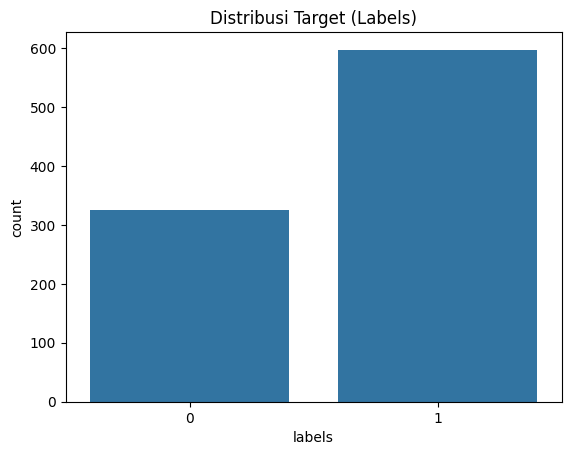

In [ ]:
sns.countplot(x='labels', data=df)
plt.title("Distribusi Target (Labels)")
plt.show()

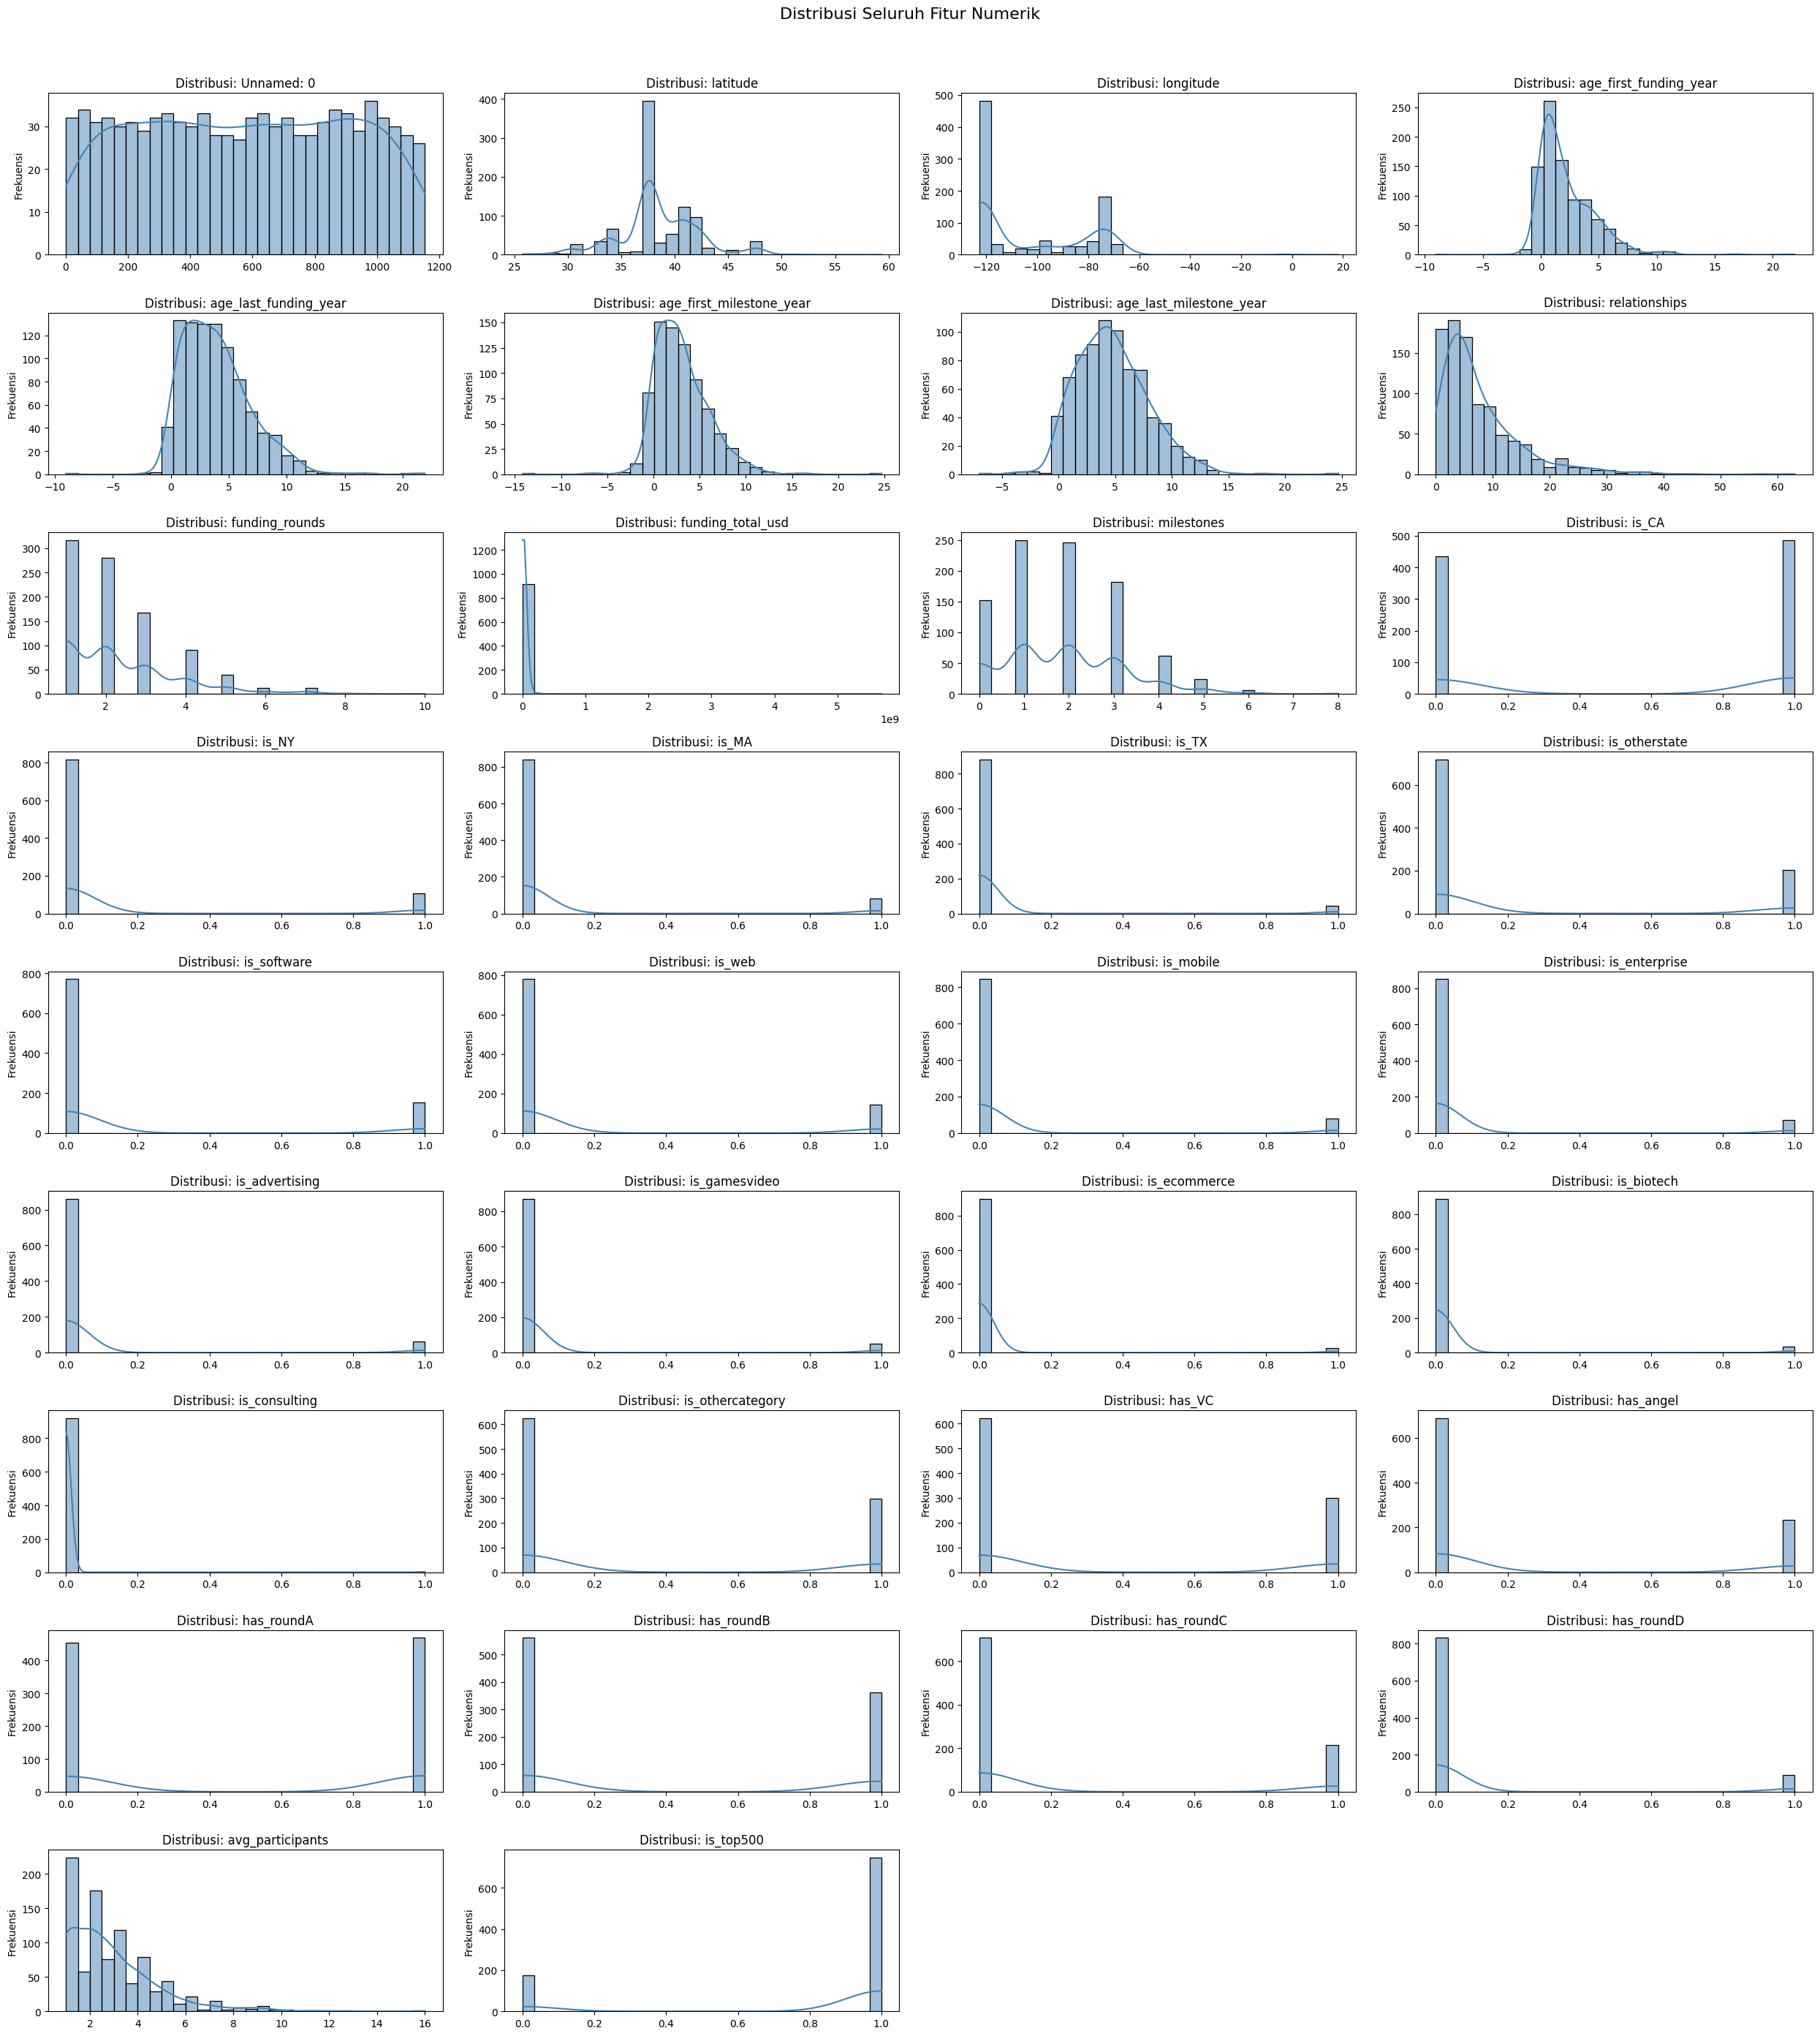

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.drop('labels')
rows = int(np.ceil(len(numerical_features) / 4))
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Distribusi: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekuensi')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribusi Seluruh Fitur Numerik", fontsize=16, y=1.03)
plt.show()

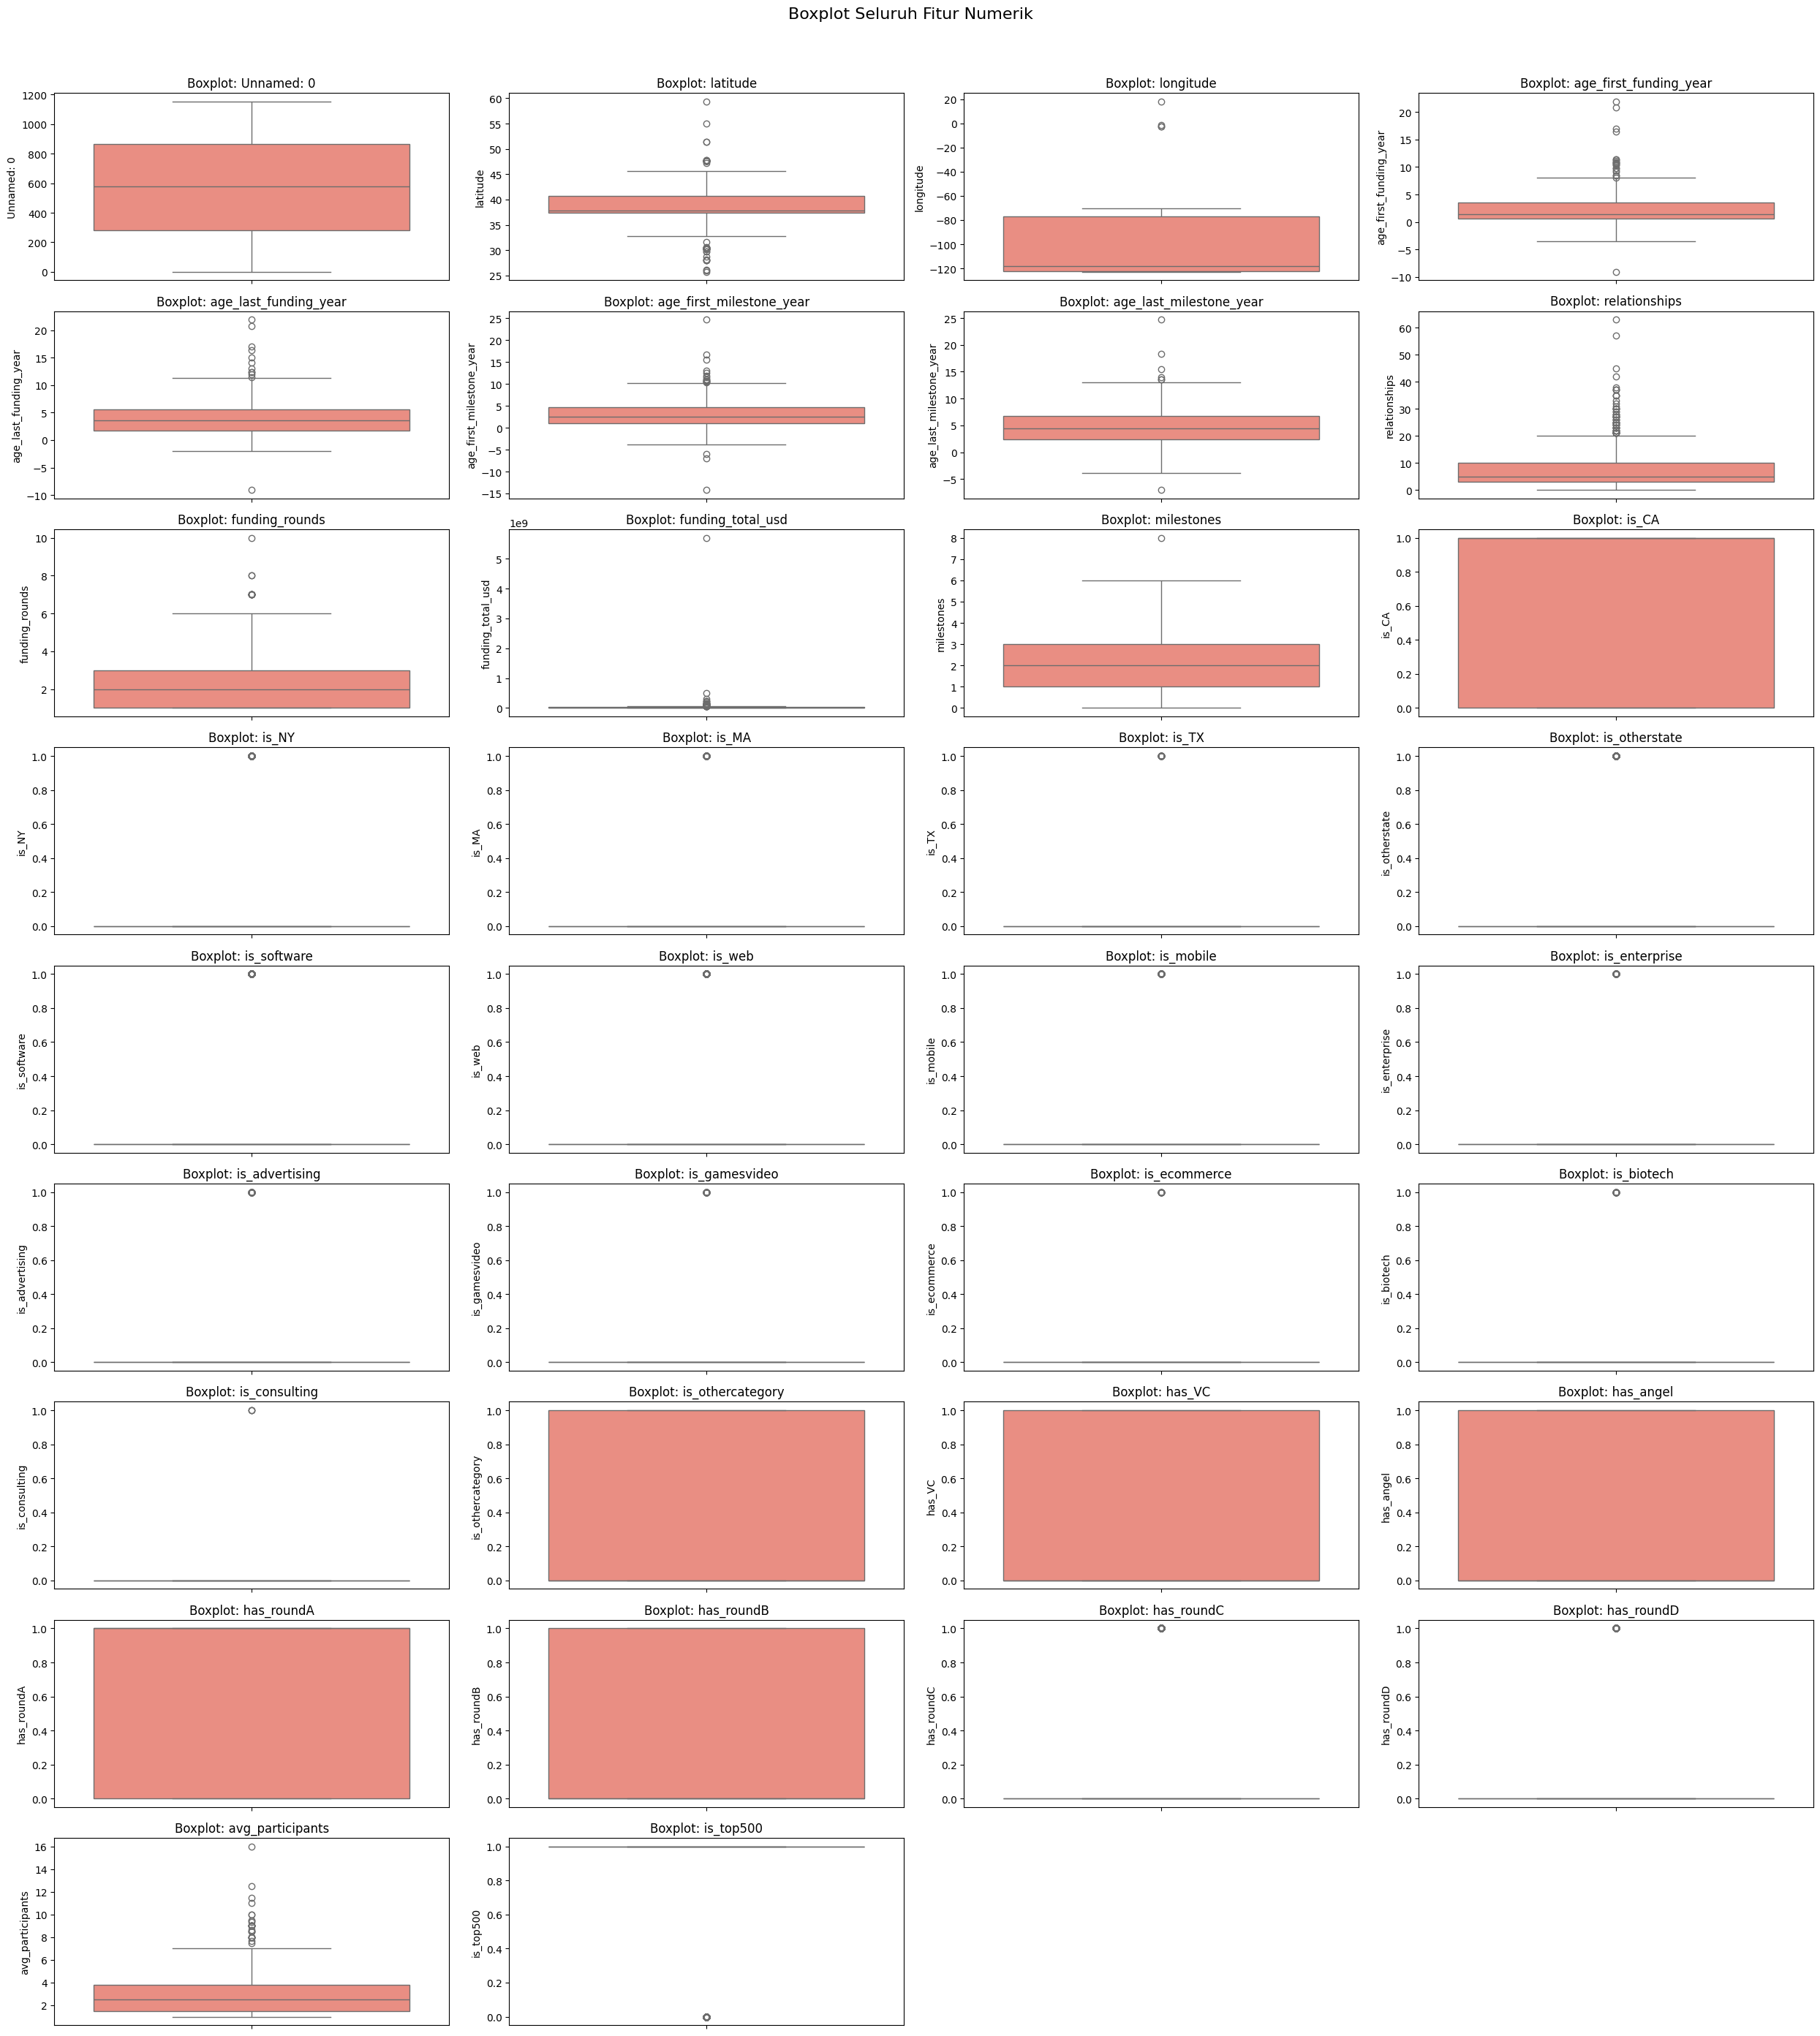

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot: {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplot Seluruh Fitur Numerik", fontsize=16, y=1.03)
plt.show()

### **Insight Eksplorasi Data (EDA)**

#### Correlation Matrix Lengkap

Gambar pertama menunjukkan matriks korelasi lengkap antar seluruh fitur numerik dan biner. Warna merah mendekati 1 menandakan korelasi positif yang sangat kuat, sedangkan warna biru mendekati -1 menunjukkan korelasi negatif yang kuat. Fitur seperti `relationships`, `milestones`, dan `is_top500` terlihat memiliki korelasi signifikan terhadap target `labels`.

#### Heatmap Fitur Signifikan terhadap Target

Gambar kedua memperlihatkan heatmap fitur-fitur yang memiliki korelasi paling signifikan terhadap variabel target. Fitur `relationships` (0.36), `milestones` (0.33), dan `is_top500` (0.31) menjadi kandidat kuat untuk dijadikan fitur utama karena kontribusinya dalam membedakan kelas target.

#### Distribusi Target

Gambar ketiga adalah distribusi label target. Terlihat bahwa proporsi startup yang berhasil (label 1) lebih banyak daripada yang gagal (label 0), sehingga terjadi ketidakseimbangan kelas yang akan ditangani menggunakan teknik SMOTE pada tahap preprocessing.

#### Distribusi Fitur Numerik

Gambar keempat menunjukkan distribusi histogram dari seluruh fitur numerik. Banyak fitur memiliki distribusi skewed ke kanan (right-skewed), seperti `funding_total_usd` dan `avg_participants`, yang menunjukkan sebagian besar nilai berada di rentang rendah, dan hanya sedikit yang bernilai sangat besar.

#### Boxplot Fitur Numerik

Gambar kelima menampilkan boxplot dari semua fitur numerik untuk mengidentifikasi outlier. Hampir semua fitur memiliki outlier, khususnya pada aspek pendanaan dan usia milestone. Temuan ini kemudian ditindaklanjuti dengan teknik winsorizing untuk mengurangi pengaruh outlier terhadap pelatihan model.

Eksplorasi data awal dilakukan untuk memahami struktur data, distribusi target, dan hubungan antar fitur. Dataset ini tidak memiliki data duplikat, namun ditemukan beberapa nilai kosong (missing value) pada kolom milestone yang kemudian diisi (imputasi). Selain itu, outlier terlihat cukup dominan pada fitur numerik, terutama `funding_total_usd`, dan ditangani dengan teknik winsorizing.

Distribusi target menunjukkan bahwa proporsi startup yang berhasil (label = 1) lebih besar daripada yang gagal (label = 0), sehingga terdapat ketidakseimbangan kelas yang perlu ditangani di tahap preprocessing.

Dari analisis korelasi numerik terhadap target (`labels`), diperoleh fitur-fitur dengan korelasi paling signifikan, yaitu:

* `relationships` (0.36)
* `milestones` (0.33)
* `is_top500` (0.31)
* `age_last_milestone_year` (0.27)
* `has_roundB` (0.21)
* `funding_rounds` (0.21)

Fitur-fitur ini menjadi dasar utama seleksi fitur model karena menunjukkan hubungan paling kuat terhadap keberhasilan startup. Visualisasi heatmap khusus juga digunakan untuk menyoroti fitur yang memiliki korelasi signifikan terhadap target. Sebagian besar distribusi fitur numerik bersifat skewed ke kanan (right-skewed), yang menunjukkan dominasi nilai kecil dalam populasi startup.


# Data Preprosessing

In [3]:
lst = ['age_first_milestone_year','age_last_milestone_year']
df[lst] = df[lst].fillna(0)

In [4]:
df.rename(columns={
    'is_top500': 'populer',
    'age_first_milestone_year': 'umur_milestone_pertama',
    'age_last_milestone_year': 'umur_milestone_terakhir',
    'relationships': 'relasi',
    'funding_rounds': 'jumlah_pendanaan',
    'milestones': 'jumlah_milestone',
    'avg_participants': 'rata_partisipan',
    'age_first_funding_year': 'umur_pendanaan_pertama',
    'age_last_funding_year': 'umur_pendanaan_terakhir',
    'funding_total_usd': 'total_dana',
    'category_code' : 'kategori'
}, inplace=True)

In [5]:
df = df.drop(columns=['Unnamed: 0', 'id', 'object_id', 'name', 'city', 'zip_code',
                      'latitude', 'longitude', 'Unnamed: 6', 'state_code', 'state_code.1',
                      'is_CA', 'is_TX', 'is_NY', 'is_otherstate', 'founded_at', 'closed_at',
                      'first_funding_at', 'last_funding_at', 'status', 'has_roundC', 'has_roundD',
                      'is_MA', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                      'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
                      'is_othercategory', 'has_VC', 'has_angel','has_roundA','has_roundB'], errors='ignore')

In [6]:
df.head()

,labels,umur_pendanaan_pertama,umur_pendanaan_terakhir,umur_milestone_pertama,umur_milestone_terakhir,relasi,jumlah_pendanaan,total_dana,jumlah_milestone,kategori,rata_partisipan,populer
0,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1.0000,0
1,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,4.7500,1
2,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,4.0000,1
3,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,3.3333,1
4,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,1.0000,1


In [7]:
USD_TO_IDR = 16000
money_columns = ['total_dana', 'dana_per_pendanaan', 'rasio_dana_per_relasi']

for col in money_columns:
    if col in df.columns:
        df[col] = df[col] * USD_TO_IDR

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   labels                   923 non-null    int64  
 1   umur_pendanaan_pertama   923 non-null    float64
 2   umur_pendanaan_terakhir  923 non-null    float64
 3   umur_milestone_pertama   923 non-null    float64
 4   umur_milestone_terakhir  923 non-null    float64
 5   relasi                   923 non-null    int64  
 6   jumlah_pendanaan         923 non-null    int64  
 7   total_dana               923 non-null    int64  
 8   jumlah_milestone         923 non-null    int64  
 9   kategori                 923 non-null    object 
 10  rata_partisipan          923 non-null    float64
 11  populer                  923 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 86.7+ KB


In [10]:
for col in ['umur_milestone_pertama', 'umur_milestone_terakhir', 'relasi', 'jumlah_pendanaan', 'jumlah_milestone', 'rata_partisipan']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [11]:
categorical_cols = ['kategori']
numerical_cols = [
    'umur_milestone_terakhir', 'relasi', 'umur_pendanaan_pertama',
    'total_dana', 'umur_pendanaan_terakhir', 'umur_milestone_pertama',
    'rata_partisipan', 'kategori', 'jumlah_pendanaan', 'jumlah_milestone'
]

In [12]:
df['rasio_dana_per_relasi'] = df['total_dana'] / (df['relasi'] + 1)
df['dana_per_pendanaan'] = df['total_dana'] / (df['jumlah_pendanaan'] + 1)

numerical_cols.extend(['rasio_dana_per_relasi', 'dana_per_pendanaan'])

In [13]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

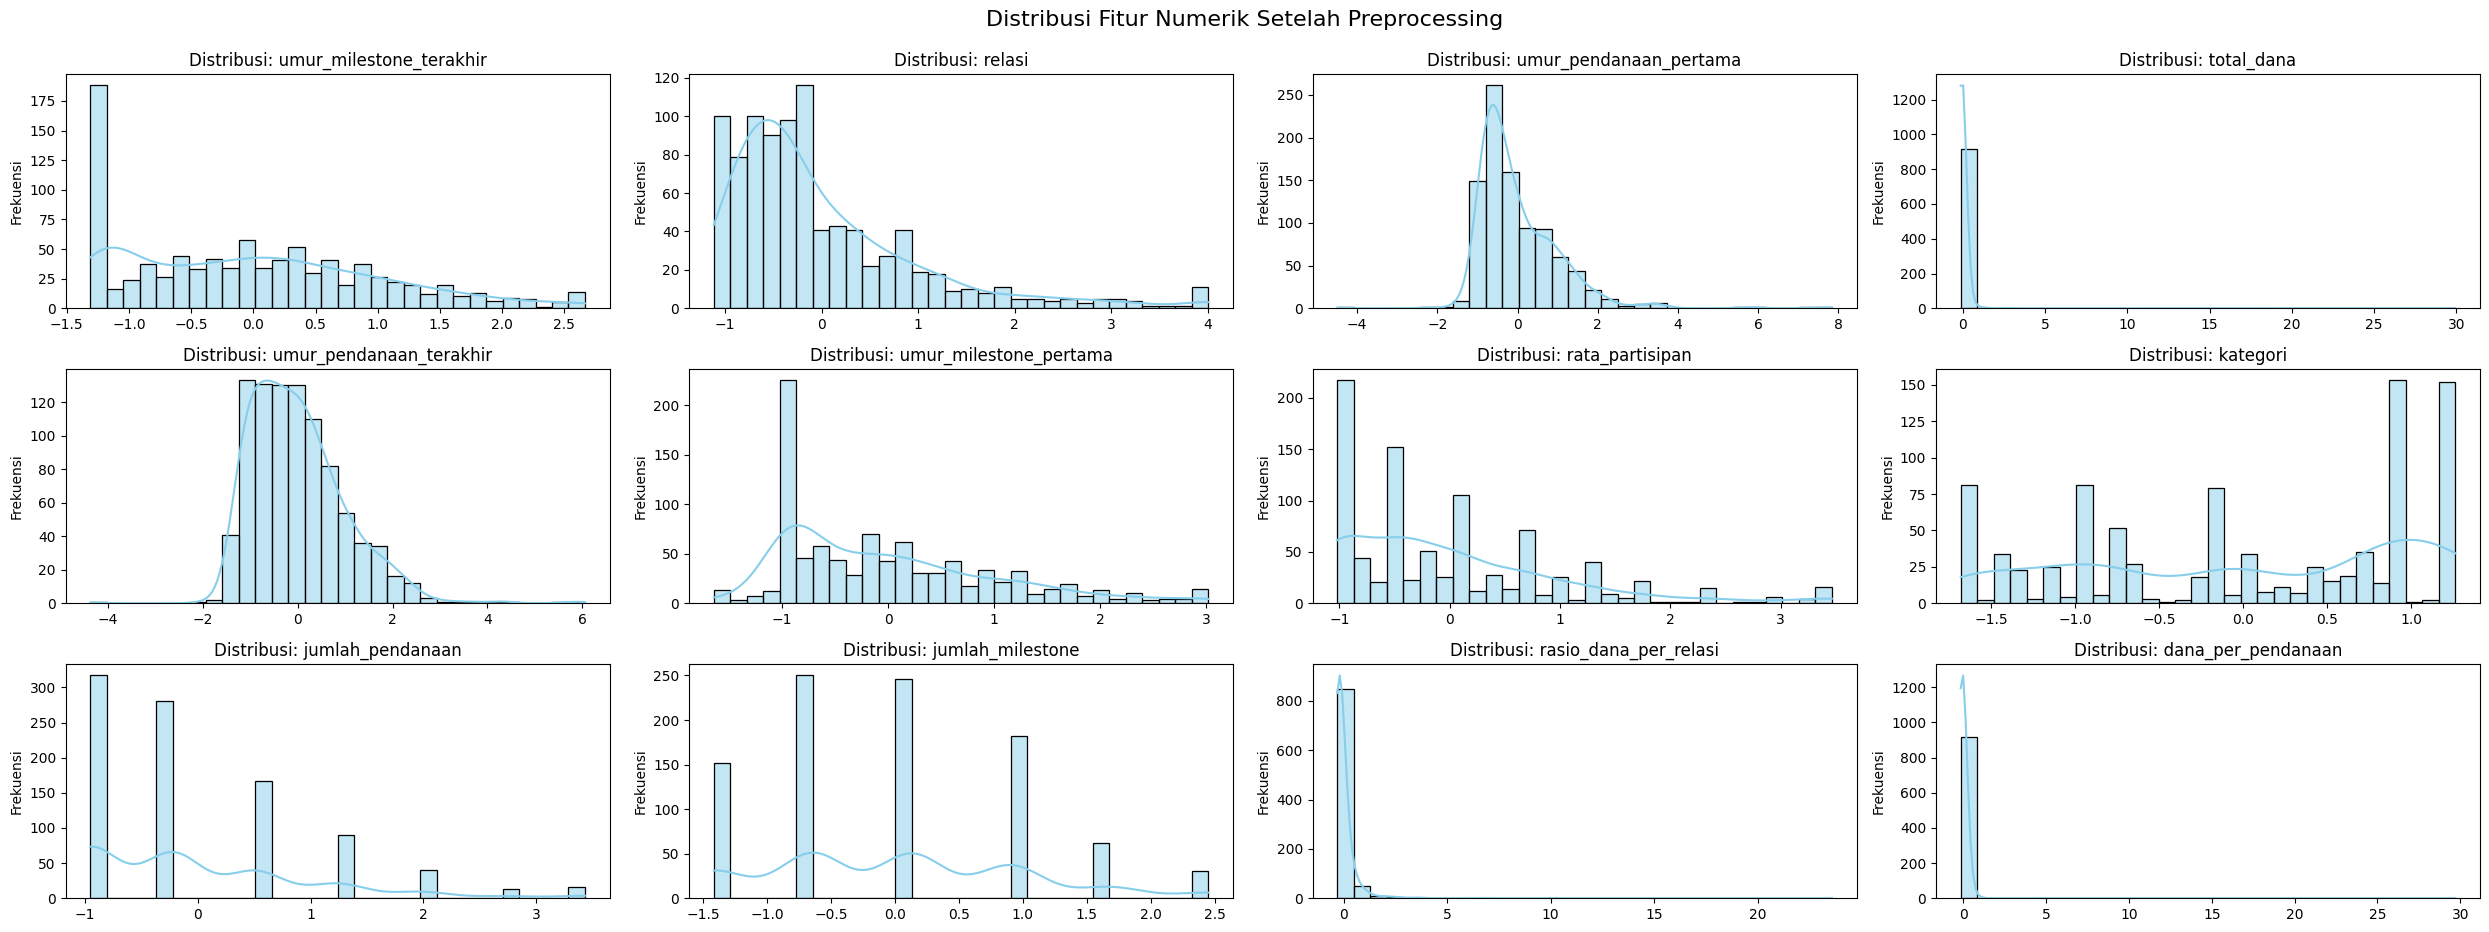

In [15]:
rows = int(np.ceil(len(numerical_cols) / 4))
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(25, rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribusi: {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frekuensi")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerik Setelah Preprocessing", fontsize=16, y=1.03)
plt.show()


In [15]:
joblib.dump(scaler, 'scaler_startup_success.pkl')

['scaler_startup_success.pkl']

In [16]:
joblib.dump(le, 'label_encoder_kategori.pkl')

['label_encoder_kategori.pkl']

In [17]:
df.to_csv("startup_data_preprocessed.csv", index=False)

### Insight Data Preprocessing

Setelah dilakukan eksplorasi dan pembersihan awal, sejumlah fitur penting dipilih berdasarkan korelasi terhadap target `labels` serta importance score dari model Random Forest. Fitur-fitur yang digunakan dalam pelatihan model antara lain:

* umur\_milestone\_terakhir
* relasi
* umur\_pendanaan\_pertama
* total\_dana
* umur\_pendanaan\_terakhir
* umur\_milestone\_pertama
* rata\_partisipan
* kategori (encoded)
* jumlah\_pendanaan
* jumlah\_milestone
* rasio\_dana\_per\_relasi
* dana\_per\_pendanaan
* populer

Tahap preprocessing bertujuan untuk mempersiapkan data agar sesuai untuk pelatihan model. Proses ini mencakup beberapa langkah utama berikut:

1. **Penanganan Missing Value:**
   Nilai kosong pada fitur `age_first_milestone_year` dan `age_last_milestone_year` diisi dengan nilai nol (imputasi konservatif) untuk mempertahankan jumlah data tanpa mengintroduksi bias.

2. **Penggantian Nama Kolom:**
   Beberapa nama kolom diganti agar lebih deskriptif dan konsisten, misalnya `is_top500` menjadi `populer`, `relationships` menjadi `relasi`, dan `funding_total_usd` menjadi `total_dana`.

3. **Penghapusan Kolom Tidak Relevan:**
   Kolom seperti ID, lokasi geografis, dan status pendanaan spesifik dihapus karena tidak memberikan kontribusi berarti terhadap prediksi atau redundan terhadap fitur lain.dan mengubah isi kolom total dana ke rupiah

4. **Penanganan Outlier:**
   Fitur numerik seperti `relasi`, `jumlah_pendanaan`, dan `jumlah_milestone` yang mengandung nilai ekstrem ditangani menggunakan teknik **winsorizing** dengan batas 1% di kedua sisi distribusi.

5. **Encoding Fitur Kategorikal:**
   Fitur `kategori` yang merupakan string dikonversi ke angka menggunakan `LabelEncoder`, lalu disimpan untuk kebutuhan inferensi selanjutnya.

6. **Feature Engineering:**
   Dua fitur baru ditambahkan untuk memperkaya representasi data:

   * `rasio_dana_per_relasi` = total\_dana / (relasi + 1)
   * `dana_per_pendanaan` = total\_dana / (jumlah\_pendanaan + 1)

7. **Scaling Fitur Numerik:**
   Seluruh fitur numerik di-scale menggunakan `StandardScaler` agar memiliki distribusi standar (mean 0, std 1), termasuk fitur hasil rekayasa (`rasio_dana_per_relasi` dan `dana_per_pendanaan`).

Setelah seluruh tahapan preprocessing selesai, data disimpan ke dalam file `startup_data_preprocessed.csv`, dan objek `LabelEncoder` serta `StandardScaler` turut disimpan menggunakan `joblib` untuk kebutuhan inferensi di masa depan.


# Modeling & Evaluasi

In [18]:
X = df.drop(columns='labels')
y = df['labels']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
print("Distribusi y_train:", np.bincount(y_train))
print("Distribusi y_test:", np.bincount(y_test))

Distribusi y_train: [261 477]
Distribusi y_test: [ 65 120]


In [21]:
rf = RandomForestClassifier().fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importances (Random Forest):", importances)

Feature Importances (Random Forest): umur_milestone_terakhir    0.165649
relasi                     0.125988
total_dana                 0.089218
dana_per_pendanaan         0.085228
umur_pendanaan_terakhir    0.084689
umur_pendanaan_pertama     0.083996
umur_milestone_pertama     0.082951
rasio_dana_per_relasi      0.075108
rata_partisipan            0.060412
kategori                   0.049654
jumlah_milestone           0.041895
jumlah_pendanaan           0.032651
populer                    0.022560
dtype: float64


In [39]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

In [41]:
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.4137931034482758), 1: np.float64(0.7735849056603774)}


In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_auc', mode='max', factor=0.5, patience=10, verbose=1)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - auc: 0.6583 - loss: 0.6598 - val_auc: 0.8094 - val_loss: 0.5865 - learning_rate: 0.0010
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - auc: 0.8025 - loss: 0.5499 - val_auc: 0.8151 - val_loss: 0.5856 - learning_rate: 0.0010
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.7739 - loss: 0.5752 - val_auc: 0.8222 - val_loss: 0.5437 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.8287 - loss: 0.5075 - val_auc: 0.8241 - val_loss: 0.5552 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.8330 - loss: 0.5063 - val_auc: 0.8268 - val_loss: 0.5159 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8194 - loss: 0.5080 - val_auc: 0.8288 - val_loss: 0.5348 - learning_rate: 0.0010
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.8265 - loss: 0.5129 - val_auc: 0.8312 - val_loss: 0.5438 - learning_rate: 0.0010
Epoch 8/1

In [38]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC: {test_auc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Test AUC: 0.8286


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


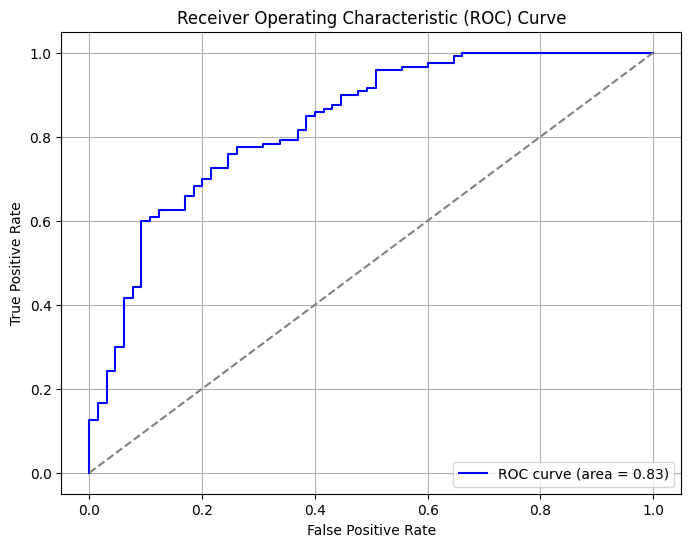

In [43]:
probs = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = sklearn_auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

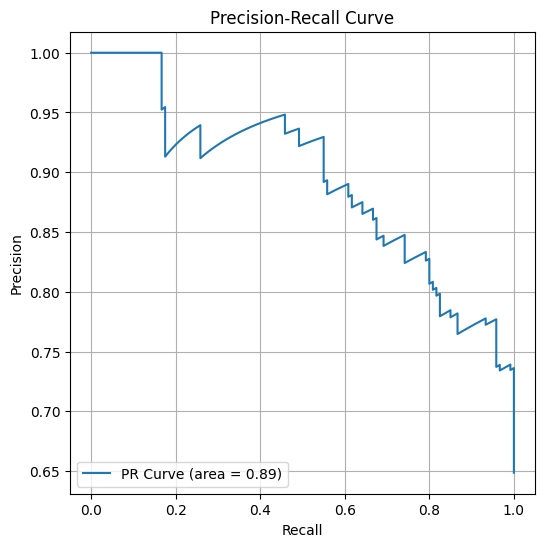

In [47]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR Curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

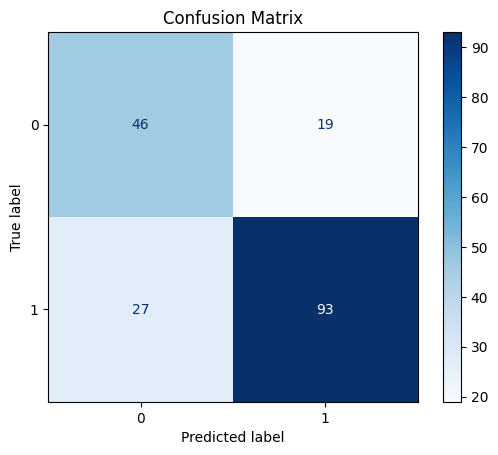

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Insight Modelling dan Evaluasi

Sebelum proses pelatihan, data dibagi menjadi data latih dan data uji dengan proporsi 80:20 menggunakan `train_test_split` dengan stratifikasi berdasarkan label target untuk menjaga distribusi kelas. Ketidakseimbangan antar kelas diatasi menggunakan pendekatan penyesuaian bobot kelas (*class\_weight*), yang lebih stabil dibandingkan metode oversampling seperti SMOTE karena tidak menimbulkan duplikasi data maupun risiko overfitting.

Untuk memahami kontribusi setiap fitur terhadap target, digunakan algoritma Random Forest Classifier untuk menghitung *feature importance*. Fitur yang memberikan kontribusi terbesar adalah `umur_milestone_terakhir`, `total_dana`, dan `dana_per_pendanaan`. Fitur-fitur ini digunakan sebagai input untuk pengembangan model Artificial Neural Network (ANN).

Model dikembangkan menggunakan Keras Sequential API dengan tiga lapisan tersembunyi berukuran 128, 64, dan 32 unit, masing-masing menggunakan fungsi aktivasi ReLU. Dropout digunakan setelah lapisan pertama dan kedua untuk mencegah overfitting. Lapisan output menggunakan fungsi aktivasi sigmoid karena tugas yang dihadapi adalah klasifikasi biner. Model dikompilasi menggunakan *binary\_crossentropy* sebagai fungsi loss dan *Adam* optimizer dengan *learning rate* sebesar 1e-3. Evaluasi utama dilakukan berdasarkan metrik AUC (Area Under Curve).

Untuk menjaga stabilitas pelatihan dan menghindari overfitting, diterapkan callback *EarlyStopping* dengan *patience* 10 dan *restore\_best\_weights=True*, serta *ReduceLROnPlateau* yang menurunkan *learning rate* secara dinamis apabila metrik validasi tidak menunjukkan peningkatan.

---

### Evaluasi Model

Setelah pelatihan selesai, performa model dievaluasi menggunakan data uji. Hasil evaluasi menunjukkan bahwa model memiliki kinerja yang cukup baik dalam membedakan kelas target.

#### Grafik Evaluasi

1. **Akurasi dan Loss**

   * Grafik akurasi menunjukkan bahwa model mengalami peningkatan secara konsisten pada data latih dan validasi tanpa indikasi overfitting yang signifikan.
   * Grafik loss menunjukkan penurunan yang stabil, mengindikasikan bahwa proses pelatihan berjalan konvergen.

2. **Kurva ROC**

   * Nilai AUC ROC sebesar 0.83 menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.

3. **Kurva Precision-Recall**

   * AUC sebesar 0.89 mengindikasikan performa yang baik terutama pada konteks data tidak seimbang, di mana metrik precision dan recall lebih informatif.

4. **Confusion Matrix**

   * True Positive: 93
   * True Negative: 46
   * False Positive: 19
   * False Negative: 27
     Hasil ini menunjukkan bahwa model relatif lebih akurat dalam mengidentifikasi kelas positif (label = 1).

# Saved Model

In [53]:
model.save('best_model.h5')

In [54]:
model.save('model_startup.keras')

In [55]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras best_model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-05-16 15:19:46.026879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747408786.053752   59556 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attem

In [56]:
from google.colab import files
!zip -r tfjs_model.zip tfjs_model
files.download('tfjs_model.zip')

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 83%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predict

In [57]:
le = joblib.load('label_encoder_kategori.pkl')
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print("Mapping LabelEncoder untuk 'kategori':")
for k, v in label_mapping.items():
    print(f"{k} → {v}")


Mapping LabelEncoder untuk 'kategori':
advertising → 0
analytics → 1
automotive → 2
biotech → 3
cleantech → 4
consulting → 5
ecommerce → 6
education → 7
enterprise → 8
fashion → 9
finance → 10
games_video → 11
hardware → 12
health → 13
hospitality → 14
manufacturing → 15
medical → 16
messaging → 17
mobile → 18
music → 19
network_hosting → 20
news → 21
other → 22
photo_video → 23
public_relations → 24
real_estate → 25
search → 26
security → 27
semiconductor → 28
social → 29
software → 30
sports → 31
transportation → 32
travel → 33
web → 34


In [65]:
# 1. Sample input
sample_input = pd.DataFrame([{
    'umur_milestone_terakhir': 2.5,
    'relasi': 8,
    'umur_pendanaan_pertama': 1.2,
    'total_dana': 12000000,
    'umur_pendanaan_terakhir': 2.0,
    'umur_milestone_pertama': 1.0,
    'rata_partisipan': 3,
    'kategori': 'music',
    'jumlah_pendanaan': 4,
    'jumlah_milestone': 4,
    'rasio_dana_per_relasi': 150000.0,
    'dana_per_pendanaan': 300000.0,
    'populer': 1
}])

# 2. Encode kategori
le = joblib.load('label_encoder_kategori.pkl')
sample_input['kategori'] = le.transform(sample_input['kategori'])

# 3. Scaling fitur numerik
scaler = joblib.load('scaler_startup_success.pkl')
scaled_features = scaler.transform(sample_input[scaler.feature_names_in_])
sample_scaled = np.concatenate([scaled_features, sample_input[['populer']].values], axis=1)

# 4. Load model dan prediksi
model = load_model('best_model.h5')
prediction = model.predict(sample_scaled)

# 5. Konversi ke label
binary_result = int(prediction[0][0] > 0.5)
label = "Sukses" if binary_result == 1 else "Gagal"

print(f"Hasil prediksi: {label} (Probabilitas: {prediction[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Hasil prediksi: Sukses (Probabilitas: 0.7805)


In [63]:
# 1. Sample input
sample_input = pd.DataFrame([{
    'umur_milestone_terakhir': 0.5,
    'relasi': 0,
    'umur_pendanaan_pertama': 0.2,
    'total_dana': 50000000,
    'umur_pendanaan_terakhir': 0.3,
    'umur_milestone_pertama': 0.4,
    'rata_partisipan': 0,
    'kategori': 'games_video',
    'jumlah_pendanaan': 0,
    'jumlah_milestone': 0,
    'rasio_dana_per_relasi': 5000.0,
    'dana_per_pendanaan': 5000.0,
    'populer': 0
}])


# 2. Encode kategori
le = joblib.load('label_encoder_kategori.pkl')
sample_input['kategori'] = le.transform(sample_input['kategori'])

# 3. Scaling
scaler = joblib.load('scaler_startup_success.pkl')
scaled_features = scaler.transform(sample_input[scaler.feature_names_in_])
sample_scaled = np.concatenate([scaled_features, sample_input[['populer']].values], axis=1)

# 4. Load model dan prediksi
model = load_model('best_model.h5')
prediction = model.predict(sample_scaled)

# 5. Konversi ke label
binary_result = int(prediction[0][0] > 0.5)
label = "Sukses" if binary_result == 1 else "Gagal"

print(f"Hasil prediksi: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Hasil prediksi: Gagal


In [66]:
import pandas as pd
import numpy as np
import joblib
import shap
from tensorflow.keras.models import load_model
import random

# 1. Sample input

sample_input = pd.DataFrame([{
    'umur_milestone_terakhir': 2.5,
    'relasi': 8,
    'umur_pendanaan_pertama': 1.2,
    'total_dana': 12000000,
    'umur_pendanaan_terakhir': 2.0,
    'umur_milestone_pertama': 1.0,
    'rata_partisipan': 3,
    'kategori': 'music',
    'jumlah_pendanaan': 4,
    'jumlah_milestone': 4,
    'rasio_dana_per_relasi': 150000.0,
    'dana_per_pendanaan': 300000.0,
    'populer': 1
}])

# 2. Load encoder dan scaler
le = joblib.load('label_encoder_kategori.pkl')
scaler = joblib.load('scaler_startup_success.pkl')

# 3. Encode kategori dan simpan versi aslinya
sample_input['kategori_encoded'] = le.transform(sample_input['kategori'])
original_input = sample_input.copy()  # simpan untuk nanti ditampilkan
sample_input['kategori'] = sample_input['kategori_encoded']
sample_input.drop(columns=['kategori_encoded'], inplace=True)

# 4. Scaling dan gabung fitur
scaled_features = scaler.transform(sample_input[scaler.feature_names_in_])
sample_scaled = np.concatenate([scaled_features, sample_input[['populer']].values], axis=1)

# 5. Load model dan prediksi
model = load_model('best_model.h5')
prediction = model.predict(sample_scaled)
binary_result = int(prediction[0][0] > 0.5)
label = "Sukses" if binary_result == 1 else "Gagal"
print(f"\nHasil prediksi: {label}")

# 6. SHAP explanation
def model_predict(X):
    return model.predict(X).flatten()

# Background dummy
background = np.vstack([sample_scaled for _ in range(10)])
explainer = shap.KernelExplainer(model_predict, background)
shap_values = explainer.shap_values(sample_scaled)
shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values

# 7. Fitur urutan model
feature_names = list(scaler.feature_names_in_) + ['populer']

# 8. Inverse transform scaler
scaled_part = sample_scaled[0][:-1].reshape(1, -1)
inversed_scaled = scaler.inverse_transform(scaled_part).flatten()

# 9. Gabungkan nilai asli dengan pop-up kategori asli
inverse_values = dict(zip(scaler.feature_names_in_, inversed_scaled))
inverse_values['populer'] = int(sample_input['populer'].values[0])
inverse_values['kategori'] = original_input['kategori'].values[0]  # ambil string asli dari input

# 10. Fungsi SHAP reason + nilai asli
def generate_reason_with_values(shap_vals, features, label_output, original_values, n_random=5):
    shap_list = list(zip(features, shap_vals[0]))
    sampled = random.sample(shap_list, min(n_random, len(shap_list)))

    reasons = []
    for feat, val in sampled:
        arah = "menurunkan" if val > 0 else "meningkatkan"
        nilai_asli = original_values.get(feat, 0)
        # Format nilai
        if isinstance(nilai_asli, str):
            nilai_fmt = nilai_asli
        elif abs(nilai_asli) >= 1000:
            nilai_fmt = f"{int(nilai_asli):,}"
        else:
            nilai_fmt = f"{nilai_asli:.2f}"
        reasons.append(f"{feat.replace('_', ' ')} ({nilai_fmt}) {arah} kemungkinan {label_output.lower()}")
    return " dan ".join(reasons)

# 11. Cetak alasan
reason = generate_reason_with_values(shap_array, feature_names, label, inverse_values, n_random=5)
print("\nAlasan prediksi:\n", reason)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Hasil prediksi: Sukses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Alasan prediksi:
 rata partisipan (3.00) meningkatkan kemungkinan sukses dan kategori (music) meningkatkan kemungkinan sukses dan jumlah milestone (4.00) meningkatkan kemungkinan sukses dan umur pendanaan pertama (1.20) meningkatkan kemungkinan sukses dan umur milestone terakhir (2.50) meningkatkan kemungkinan sukses


### Inferensi

Untuk melakukan prediksi terhadap startup baru, dilakukan pipeline inferensi dengan langkah sebagai berikut:

1. Data input dimasukkan dalam format `DataFrame` sesuai dengan urutan fitur yang telah digunakan saat pelatihan model.
2. Fitur `kategori` diencode menggunakan objek `LabelEncoder` yang telah disimpan sebelumnya.
3. Fitur numerik di-scale menggunakan `StandardScaler` yang sama dengan saat pelatihan.
4. Fitur `populer` digabungkan kembali secara manual karena tidak disertakan dalam scaling.
5. Model `best_model.h5` dimuat dan digunakan untuk memprediksi nilai probabilistik.
6. Output probabilistik dikonversi ke label:

   * ≥ 0.5 → **Sukses**
   * < 0.5 → **Gagal**

Contoh prediksi:

* **Sample 1** → Sukses
* **Sample 2** → Gagal

In [67]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.2
astropy-iers-data                     0.2025.5.12.0.38.29
astunparse                            1